# 1. Environment Setup

In [ ]:
!python -m venv .venv
#.\venv\Scripts\activate


In [ ]:
!venv\Scripts\python -m pip install jupyter
!venv\Scripts\python -m pip install ipykernel
!venv\Scripts\python -m ipykernel install --user --name=venv --display-name ".venv"


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: d:\Rep\CNN\venv\Scripts\python.exe -m pip install --upgrade pip


  Using cached ipykernel-6.29.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached debugpy-1.8.9-cp312-cp312-win_amd64.whl.metadata (1.1 kB)
  Using cached ipython-8.30.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached matplotlib_inline-0.1.7-py3-none-any.whl.metadata (3.9 kB)
  Using cached nest_asyncio-1.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached psutil-6.1.0-cp37-abi3-win_amd64.whl.metadata (23 kB)
  Using cached pyzmq-26.2.0-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached prompt_toolkit-3.0.48-py3-none-any.whl.metadata (6.4 kB)
  Using cached pygments-2.18.0-py3-n


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: d:\Rep\CNN\venv\Scripts\python.exe -m pip install --upgrade pip


Installed kernelspec venv in C:\Users\user\AppData\Roaming\jupyter\kernels\venv


# 2. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               3.0.0
astunparse              1.6.3
certifi                 2024.8.30
charset-normalizer      3.4.0
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.8.9
decorator               5.1.1
executing               2.1.0
flatbuffers             24.3.25
fonttools               4.55.1
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.68.1
h5py                    3.12.1
idna                    3.10
ipykernel               6.29.5
ipython                 8.30.0
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.7.0
kiwisolver              1.4.7
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              3.0.2
matplotlib           

In [1]:
pip install albumentations

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.8 MB 6.3 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/38.8 MB 7.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/38.8 MB 7.2 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.8 MB 6.8 MB/s eta 0:00:05
   ------ --------------------------------- 6.3/38.8 MB 6.2 MB/s eta 0:00:06
   ------- -------------------------------- 7.6/38.8 MB 6.2 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.8 MB 6.2 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/38.8 MB 6.2 MB/s eta 0:00:05
   ------------ --------------------------- 11.8/38.8 MB 6.3 MB/s eta 0:00:05
   ------------- -------------------------- 12.8/38.8 MB 6.2 MB/s eta 0:00:05
   -------------- ------------------------- 14.4/38.8 MB 6.3 MB/s eta 0:00:04
   ---------------- ----------------------- 16.0/38.8 MB 6.4 MB/s eta 0:00:04
 

# 2. Importing libraries

In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
import cv2
import albumentations as A
import os


In [3]:
# Path to dataset folder
dataset_path = "RealWaste"

# Calculate the deficit for each class
class_image_counts = {}
target_count = 1000

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    current_count = len(os.listdir(class_folder))
    class_image_counts[class_name] = current_count
    print(f"{class_name}: {current_count} images")

# Display deficit for each class
class_deficit = {k: max(0, target_count - v) for k, v in class_image_counts.items()}
print("\nImages needed per class:")
print(class_deficit)


Cardboard: 1000 images
Food Organics: 1000 images
Glass: 1000 images
Metal: 1000 images
Paper: 1000 images
Plastic: 1000 images
Textile Trash: 1000 images
Vegetation: 1000 images

Images needed per class:
{'Cardboard': 0, 'Food Organics': 0, 'Glass': 0, 'Metal': 0, 'Paper': 0, 'Plastic': 0, 'Textile Trash': 0, 'Vegetation': 0}


In [ ]:
# Define augmentation pipeline
augmentation_pipeline = A.Compose([
    A.Rotate(limit=20, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5)
])

def augment_class(class_folder, deficit, target_count):
    images = os.listdir(class_folder)
    current_count = len(images)
    
    # Augment only if deficit > 0
    if deficit > 0:
        print(f"Augmenting {deficit} images for class: {os.path.basename(class_folder)}")
        
        for i in range(deficit):
            img_name = images[i % len(images)]  # Loop through existing images
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Apply augmentation
            augmented = augmentation_pipeline(image=img)
            aug_img = augmented['image']
            
            # Save augmented image in the same folder
            new_img_name = f"aug_{current_count + i}.jpg"
            save_path = os.path.join(class_folder, new_img_name)
            cv2.imwrite(save_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
        
        print(f"Completed augmentation for class: {os.path.basename(class_folder)}")
    else:
        print(f"No augmentation needed for class: {os.path.basename(class_folder)}")

# Paths
dataset_path = "RealWaste"

# Augment and add to original dataset for classes with deficit
for class_name, deficit in class_deficit.items():
    class_folder = os.path.join(dataset_path, class_name)
    augment_class(class_folder, deficit, target_count)


Augmenting 539 images for class: Cardboard
Completed augmentation for class: Cardboard
Augmenting 589 images for class: Food Organics
Completed augmentation for class: Food Organics
Augmenting 580 images for class: Glass
Completed augmentation for class: Glass
Augmenting 210 images for class: Metal
Completed augmentation for class: Metal
Augmenting 505 images for class: Miscellaneous Trash
Completed augmentation for class: Miscellaneous Trash
Augmenting 500 images for class: Paper
Completed augmentation for class: Paper
Augmenting 79 images for class: Plastic
Completed augmentation for class: Plastic
Augmenting 682 images for class: Textile Trash
Completed augmentation for class: Textile Trash
Augmenting 564 images for class: Vegetation
Completed augmentation for class: Vegetation


# 3. Loading Data

In [4]:
data = tf.keras.utils.image_dataset_from_directory('RealWaste',label_mode='int')

Found 8000 files belonging to 8 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

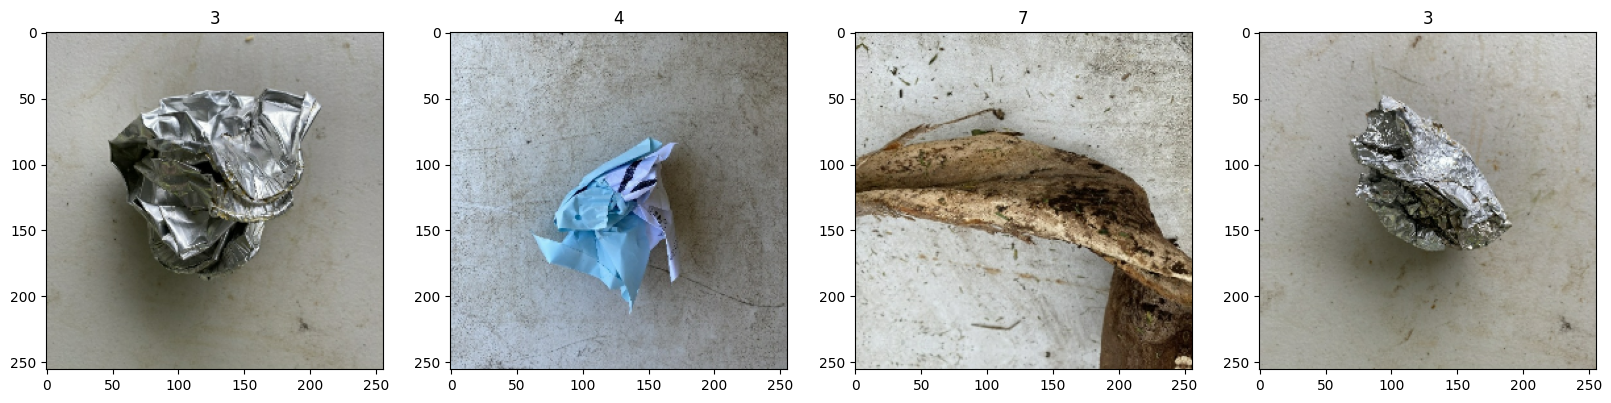

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scaling the Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.5850969 , 0.5811753 , 0.4988224 ],
          [0.57211363, 0.56819206, 0.48583913],
          [0.57075053, 0.5785937 , 0.49231914],
          ...,
          [0.369925  , 0.36600342, 0.2836505 ],
          [0.37496936, 0.3710478 , 0.28869486],
          [0.37744883, 0.37352726, 0.29117432]],
 
         [[0.586539  , 0.5826174 , 0.50026447],
          [0.58152574, 0.5776042 , 0.49525124],
          [0.5804551 , 0.58829826, 0.50202376],
          ...,
          [0.37301025, 0.36908868, 0.28673574],
          [0.3641544 , 0.36023283, 0.2778799 ],
          [0.3849071 , 0.38098553, 0.29863256]],
 
         [[0.5749677 , 0.5710461 , 0.48869318],
          [0.5773914 , 0.5734698 , 0.49111688],
          [0.5832656 , 0.59110874, 0.50483423],
          ...,
          [0.3716299 , 0.36770833, 0.2853554 ],
          [0.36967248, 0.3657509 , 0.28339797],
          [0.36998793, 0.36606637, 0.28371343]],
 
         ...,
 
         [[0.5356038 , 0.5395254 , 0.41795677],
          [0.53400

# 5. Spliting the Data

In [17]:
print(len(data))
print(int(len(data)*.6))
print(int(len(data)*.2))

250
150
50


In [18]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [50]:
model = Sequential()

In [51]:
# Block 1: Convolutional Layer + Max Pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 2: Convolutional Layer + Max Pooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 3: Convolutional Layer + Max Pooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Fully Connected Layers
model.add(Flatten())  # Flatten the feature maps

# Dense Layer 1: Fully connected with minimal neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer: Softmax for multi-class classification
model.add(Dense(8, activation='softmax'))  # 8 classes

In [52]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871,624 (64.36 MB)

 Trainable params: 16,871,624 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 389ms/step - accuracy: 0.1877 - loss: 2.0393 - val_accuracy: 0.4512 - val_loss: 1.6145
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 385ms/step - accuracy: 0.3949 - loss: 1.6716 - val_accuracy: 0.5031 - val_loss: 1.4471
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 61s 405ms/step - accuracy: 0.4420 - loss: 1.5392 - val_accuracy: 0.5375 - val_loss: 1.3200
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 423ms/step - accuracy: 0.4673 - loss: 1.4394 - val_accuracy: 0.5750 - val_loss: 1.2393
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 362ms/step - accuracy: 0.5033 - loss: 1.3420 - val_accuracy: 0.5900 - val_loss: 1.1875
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 362ms/step - accuracy: 0.5241 - loss: 1.2874 - val_accuracy: 0.5806 - val_loss: 1.1698
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 363ms/step - accuracy: 0.5562 - loss: 1.2153 - val_accuracy: 0.6156 - val_loss: 1.0964
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 363ms/step - accuracy: 0.5721 - loss: 1

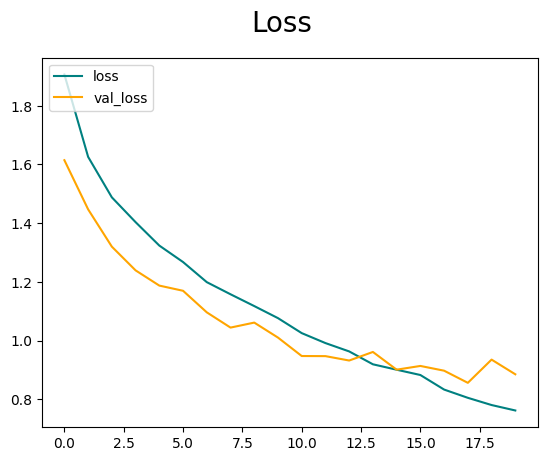

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

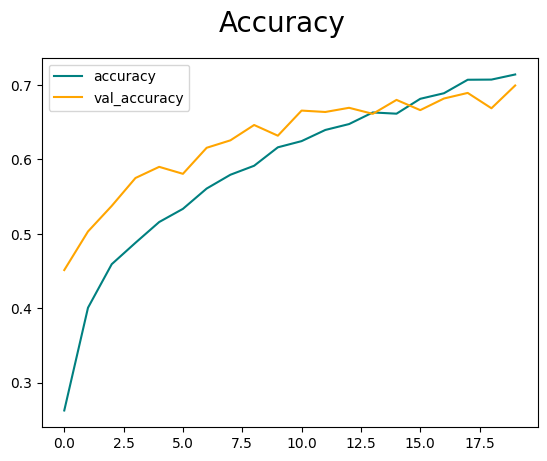

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [60]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.3 MB/s eta 0:00:03
   -------- -

In [66]:
pip install seaborn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [63]:
train_loss, train_accuracy = model.evaluate(train, verbose=0)
test_loss, test_accuracy = model.evaluate(test, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 86.48%
Test Accuracy: 70.38%


In [71]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(test), axis=1)  # Convert probabilities to class labels
y_true = np.concatenate([y for x, y in test], axis=0)  # Extract true labels from the dataset

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step
Confusion Matrix:
 [[28 26 26 24 27 27 28 32]
 [30 33 23 22 24 24 23 19]
 [29 26 22 23 23 32 30 31]
 [26 32 23 16 22 22 20 16]
 [32 37 34 24 21 26 19 19]
 [27 25 23 14 24 29 28 22]
 [30 25 19 15 28 27 27 18]
 [28 26 25 20 21 27 26 25]]


In [72]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.12
Recall: 0.13
